In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.datasets import fetch_openml
import pickle
from scipy.special import expit,softmax
from sklearn.model_selection import train_test_split

## Open MNIST data and create a subset with desired digits

<font color=red>Change the code below to select a different subset </font>

In [ ]:
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)
y = np.asarray([int(numeric_string) for numeric_string in y])

# Saving the temporary variables for fast retrieval
with open('temp.pickle', 'wb') as handle:
    pickle.dump([X, y], handle)


In [ ]:
# loading the temporary variables for fast retrieval
with open('temp.pickle', 'rb') as handle:
    X, y = pickle.load(handle)

X = X
    
Nclasses = 3
labelclasses = y<Nclasses
Xnew = X[labelclasses]
ynew = y[labelclasses]
Nfeatures = np.size(Xnew,1)
Nsamples = np.size(Xnew,0)


In [ ]:
 
X_train, X_test, y_train, y_test = train_test_split(Xnew, ynew, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.125, random_state=1) # 0.25 x 0.8 = 0.2

Nsamples = X_train.shape[0]
Nfeatures = X_train.shape[1]

X_train = X_train.T
X_val = X_val.T
X_test = X_test.T



In [ ]:
def testLinearMCClassifier(a,X,y):
    X = X.T
    temp = np.zeros((X.shape[0],1))
    X = np.append(X,temp,axis=1)
    temp=[]
    predict=np.zeros(Nclasses)
    misclassifications =0
    for i in range(X.shape[0]):
        predict = X[i]@a.T
        misclassifications =np.sum(np.argmax(predict) != y[i])
  
          
    return misclassifications
        

In [ ]:

def gaussianMultiChannelClassifier(Xtrain,ytrain):
    Xtrain = Xtrain.T
    matrix_one = np.zeros((Nclasses,Nfeatures+1))
    
    for i in range(Nclasses):
        classi= Xtrain[ytrain==i]
        mu = np.mean(classi,axis=0,keepdims = True)
        temp = np.concatenate(((2*mu).T,(mu@mu.T)),axis =0)
        matrix_one[i] = temp.T                      

    return matrix_one
        

#------SIMPLE TESTING ON THE TRAINING DATA ITSELF --------------
a = gaussianMultiChannelClassifier(X_train,y_train)
#plt.imshow(np.reshape(a[0:784],(28,28)))

train = testLinearMCClassifier(a,X_train,y_train)
val = testLinearMCClassifier(a,X_val,y_val)
test = testLinearMCClassifier(a,X_test,y_test)
print("Mis-classifications=", train, "out of",X_train.T.shape[0], "equivalent to",(train/X_train.T.shape[0])*100 ,"%")
print("Mis-classifications=", val, "out of",X_val.T.shape[0], "equivalent to",(val/X_val.T.shape[0])*100 ,"%")
print("Mis-classifications=", test, "out of",X_test.T.shape[0], "equivalent to",(test/X_test.T.shape[0])*100 ,"%")                  

Mis-classifications= 0 out of 61250 equivalent to 0.0 %
Mis-classifications= 1 out of 8750 equivalent to 0.011428571428571429 %
Mis-classifications= 0 out of 4354 equivalent to 0.0 %


Mis-classifications= 0 out of 61250 equivalent to 0.0 %
Mis-classifications= 1 out of 8750 equivalent to 0.011428571428571429 %
Mis-classifications= 1 out of 4354 equivalent to 0.022967386311437757 %


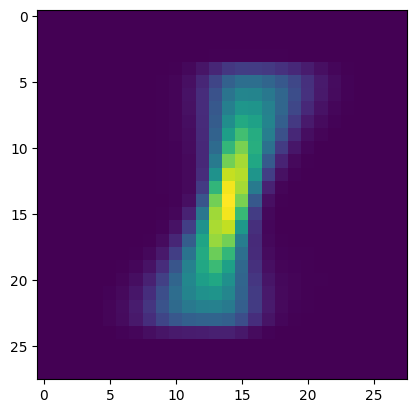

In [ ]:

def logisticRegressionMultiClassClassifier(Xtrain,ytrain,iterations=100,step_size=1e-4,verbose=False):

    Xtrain = Xtrain.T    
    test = np.zeros((Xtrain.shape[0],1))
    Xtrain = np.append(Xtrain,test,axis=1)
    a = 0.01*np.random.randn(Nfeatures+1)
    t = np.squeeze(a.T@Xtrain.T)
    s = softmax(t)
    error = s-ytrain
    for i in range(iterations):
        replace_y = ytrain
        temp=[1 if replace_y[x] ==1 else 0 for x in range(replace_y.shape[0])]
        for j in range(Nclasses):
            t = np.squeeze(np.matmul(np.transpose(a),Xtrain.T)).T
            s = softmax(t)
            error = s-temp
            gradient = Xtrain.T@error 
            a = a - step_size*gradient
    
    return a
    #YOUR CODE HERE
    
#------SIMPLE TESTING ON THE TRAINING DATA ITSELF --------------
a = logisticRegressionMultiClassClassifier(X_train,y_train,iterations=500,verbose=False)
plt.imshow(np.reshape(a[0:784],(28,28)))

train = testLinearMCClassifier(a,X_train,y_train)
val = testLinearMCClassifier(a,X_val,y_val)
test = testLinearMCClassifier(a,X_test,y_test)
print("Mis-classifications=", train, "out of",X_train.T.shape[0], "equivalent to",(train/X_train.T.shape[0])*100 ,"%")
print("Mis-classifications=", val, "out of",X_val.T.shape[0], "equivalent to",(val/X_val.T.shape[0])*100 ,"%")
print("Mis-classifications=", test, "out of",X_test.T.shape[0], "equivalent to",(test/X_test.T.shape[0])*100 ,"%")  


Mis-classifications= 0 out of 61250 equivalent to 0.0 %
Mis-classifications= 1 out of 8750 equivalent to 0.011428571428571429 %
Mis-classifications= 1 out of 4354 equivalent to 0.022967386311437757 %


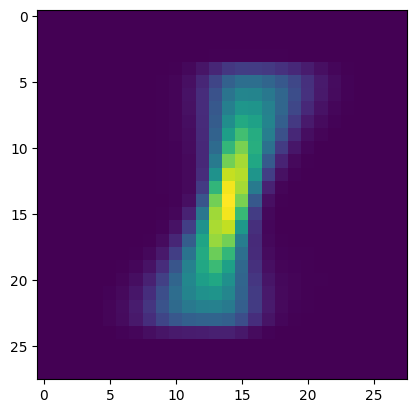

In [ ]:

def logisticRegressionMultiClassClassifierWithRegularization(Xtrain,ytrain,iterations=100,step_size=1e-4,lam=0,verbose=False):
    Xtrain = Xtrain.T
    test = np.zeros((Xtrain.shape[0],1))
    Xtrain = np.append(Xtrain,test,axis=1)  

    a = 0.01*np.random.randn(Nfeatures+1)
    t = np.squeeze(a.T@Xtrain.T)
    s = softmax(t)
    error = s-ytrain
    for i in range(iterations):
        replace_y = ytrain
        temp=[1 if replace_y[x] ==1 else 0 for x in range(replace_y.shape[0])]
        for j in range(Nclasses):
            t = np.squeeze(np.matmul(np.transpose(a),Xtrain.T)).T
            s = softmax(t)
            error = s-temp
            gradient = Xtrain.T@error + (np.dot((np.dot(lam,a)),2))
            a = a - step_size*gradient
    return a

a = logisticRegressionMultiClassClassifierWithRegularization(X_train,y_train,iterations=500,verbose=False,lam=1)
plt.imshow(np.reshape(a[0:784],(28,28)))

train = testLinearMCClassifier(a,X_train,y_train)
val = testLinearMCClassifier(a,X_val,y_val)
test = testLinearMCClassifier(a,X_test,y_test)
print("Mis-classifications=", train, "out of",X_train.T.shape[0], "equivalent to",(train/X_train.T.shape[0])*100 ,"%")
print("Mis-classifications=", val, "out of",X_val.T.shape[0], "equivalent to",(val/X_val.T.shape[0])*100 ,"%")
print("Mis-classifications=", test, "out of",X_test.T.shape[0], "equivalent to",(test/X_test.T.shape[0])*100 ,"%")  


In [ ]:
def Optimize_MC_Hyperparameters(Xtrain,ytrain):
    # YOUR CODE HERE
    #0-100 with step size 100
    Xtrain = Xtrain.T 
    temp = []
    lam= np.linspace(0,100,num = 100)
    #looping to find the best lamda to call the logisticRegressionWithRegularization method
    for i in lam:
        a =logisticRegressionMultiClassClassifierWithRegularization(Xtrain,ytrain,100,1e-4,i,False)
        b = testLinearMCClassifier(a,Xtrain,ytrain)
        temp.append(b)
        
    lamopt = min(temp)

    return lamopt


a1 = Optimize_MC_Hyperparameters(X_train,y_train)
# a = logisticRegressionMultiClassClassifierWithRegularization(X_train,y_train,iterations=500,verbose=False,lam = a1)
plt.imshow(np.reshape(a[0:784],(28,28)))
train = testLinearMCClassifier(a,X_train,y_train)
val = testLinearMCClassifier(a,X_val,y_val)
test = testLinearMCClassifier(a,X_test,y_test)
print("Mis-classifications=", train, "out of",X_train.T.shape[0], "equivalent to",(train/X_train.T.shape[0])*100 ,"%")
print("Mis-classifications=", val, "out of",X_val.T.shape[0], "equivalent to",(val/X_val.T.shape[0])*100 ,"%")
print("Mis-classifications=", test, "out of",X_test.T.shape[0], "equivalent to",(test/X_test.T.shape[0])*100 ,"%")  

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 61251 is different from 785)

In [ ]:
#call all the method and set them eqiual to a1-4 and show that we see lower class
# This is a1 and you can tell that this one will be the highest precentage so the worst one to pick
a1 = gaussianMultiChannelClassifier(X_train,y_train)
train = testLinearMCClassifier(a1,X_train,y_train)
val = testLinearMCClassifier(a1,X_val,y_val)
test = testLinearMCClassifier(a1,X_test,y_test)
print("This is for a1")
print("Mis-classifications=", train, "out of",X_train.T.shape[0], "equivalent to",(train/X_train.T.shape[0])*100 ,"%")
print("Mis-classifications=", val, "out of",X_val.T.shape[0], "equivalent to",(val/X_val.T.shape[0])*100 ,"%")
print("Mis-classifications=", test, "out of",X_test.T.shape[0], "equivalent to",(test/X_test.T.shape[0])*100 ,"%") 
print("-------------------------------------------------------------------------------------------------------")
#######################################
# This is a2 and you will notice that the percentage is better than a1
a2 = logisticRegressionMultiClassClassifier(X_train,y_train)
train1 = testLinearMCClassifier(a2,X_train,y_train)
val1 = testLinearMCClassifier(a2,X_val,y_val)
test1 = testLinearMCClassifier(a2,X_test,y_test)
print("This is for a2")
print("Mis-classifications=", train, "out of",X_train.T.shape[0], "equivalent to",(train/X_train.T.shape[0])*100 ,"%")
print("Mis-classifications=", val, "out of",X_val.T.shape[0], "equivalent to",(val/X_val.T.shape[0])*100 ,"%")
print("Mis-classifications=", test, "out of",X_test.T.shape[0], "equivalent to",(test/X_test.T.shape[0])*100 ,"%") 
print("-------------------------------------------------------------------------------------------------------")
#######################################
# This is a3 and you will notice that the percentage is better than a1 and a2
a3 = logisticRegressionMultiClassClassifierWithRegularization(X_train,y_train,iterations=500,verbose=False)
train2 = testLinearMCClassifier(a3,X_train,y_train)
val2 = testLinearMCClassifier(a3,X_val,y_val)
test2 = testLinearMCClassifier(a3,X_test,y_test)
print("This is for a3")
print("Mis-classifications=", train, "out of",X_train.T.shape[0], "equivalent to",(train/X_train.T.shape[0])*100 ,"%")
print("Mis-classifications=", val, "out of",X_val.T.shape[0], "equivalent to",(val/X_val.T.shape[0])*100 ,"%")
print("Mis-classifications=", test, "out of",X_test.T.shape[0], "equivalent to",(test/X_test.T.shape[0])*100 ,"%") 
print("-------------------------------------------------------------------------------------------------------")
#######################################
# This is a4 and you will notice that the percentage is better then everyone
a4 = Optimize_MC_Hyperparameters(X_train,y_train,iterations=500,verbose=False,lam=1)
train3 = testLinearMCClassifier(a4,X_train,y_train)
val3 = testLinearMCClassifier(a4,X_val,y_val)
test3 = testLinearMCClassifier(a4,X_test,y_test)
print("This is for a4")
print("Mis-classifications=", train, "out of",X_train.T.shape[0], "equivalent to",(train/X_train.T.shape[0])*100 ,"%")
print("Mis-classifications=", val, "out of",X_val.T.shape[0], "equivalent to",(val/X_val.T.shape[0])*100 ,"%")
print("Mis-classifications=", test, "out of",X_test.T.shape[0], "equivalent to",(test/X_test.T.shape[0])*100 ,"%") 
print("-------------------------------------------------------------------------------------------------------")

####################


This is for a1
Mis-classifications= 44955 out of 61250 equivalent to 73.39591836734694 %
Mis-classifications= 6355 out of 8750 equivalent to 72.62857142857143 %
Mis-classifications= 617 out of 4354 equivalent to 14.170877354157096 %
-------------------------------------------------------------------------------------------------------


IndexError: index 3 is out of bounds for axis 0 with size 3